<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [74]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.

In [75]:
scaler = StandardScaler()
columns = df.columns[2:]
df[columns]=scaler.fit_transform(df[columns])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.

In [76]:
htmp = df[df.columns[1:]].corr(method='pearson').round(2)

<AxesSubplot:>

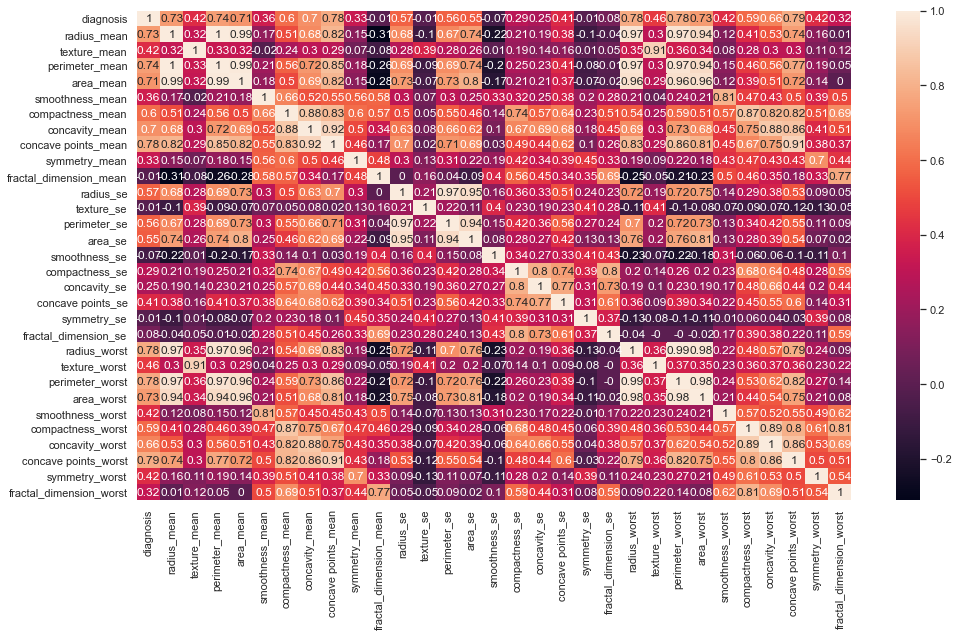

In [77]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(htmp , fmt = 'g', annot=True)

Aquellos valores en el mapa de calor que tengan correlación 1 (fuera de la diagonal) son los elementos colineales. En este caso se puede apreciar que el único par que presenta correlación 1 es 'perimeter_mean' con 'radius_mean'.

Se descartarán las variables 'perimeter_mean' y 'area_mean' para el posterior análisis. 

In [78]:
df=df.drop(['perimeter_mean','area_mean'],axis=1)

3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.

In [79]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df[df.columns[2:]])

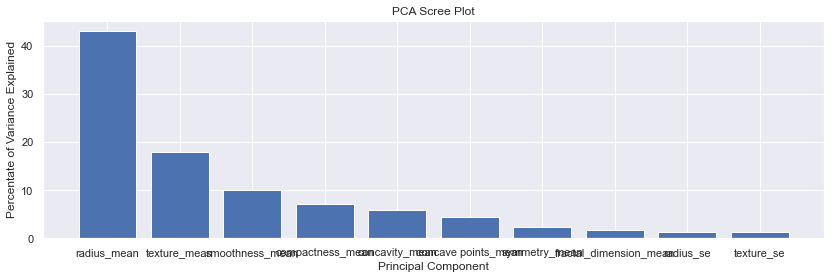

In [80]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = df.columns[2:12]

plt.figure(figsize=(14,4))
plt.bar(x= range(2,12), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

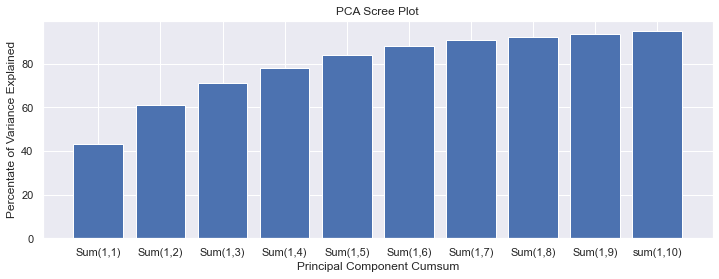

In [81]:
percent_variance_cum = np.cumsum(percent_variance)
columns = ['Sum(1,1)', 'Sum(1,2)', 'Sum(1,3)', 'Sum(1,4)','Sum(1,5)','Sum(1,6)','Sum(1,7)',
          'Sum(1,8)','Sum(1,9)','sum(1,10)']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [82]:
percent_variance_cum

array([43.08, 61.04, 71.09, 78.12, 84.  , 88.31, 90.68, 92.38, 93.74,
       94.95])

Se puede concluir que la varianza explicada por las variables se puede explicar en un 94.95% considerando solo las primeras 10 componentes de la tabla.

4. Devuelva un dataframe con las componentes principales.

5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

### Modelo Regresión Lineal

In [91]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [84]:
X=df[df.columns[2:]]
y=df['diagnosis']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model_rl = LinearRegression() # Creando el modelo.
model_rl.fit(X_train, y_train)

LinearRegression()

In [88]:
r2 =  round(r2_score(y_test, model_rl.predict(X_test)),4)

In [89]:
r2

0.726

## Modelo SVC

In [92]:
model_svc = SVC(gamma=2, C=1) # Creando el modelo.
model_svc.fit(X_train, y_train)

SVC(C=1, gamma=2)

In [93]:
r2 =  round(r2_score(y_test, model_svc.predict(X_test)),4)

In [94]:
r2

-0.6056

## Modelo de Árbol de Decisión

In [125]:
model_dt = DecisionTreeClassifier(max_depth=3) # Creando el modelo.
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [126]:
r2 =  round(r2_score(y_test, model_dt.predict(X_test)),4)

In [127]:
r2

0.776